In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


__Problema 1:__ 
>Calcule y grafique los perfiles de densidad, masa, aceleración gravitacional, presión y temperatura, en
función del radio, para un planeta tipo terrestre, de tres capas: un núcleo líquido, un núcleo sólido, y
un manto, con las mismas características que el planeta Tierra. Referencia: D. Valencia ,R. J.
O’Connell D. Sasselov. Internal structure of massive terrestrial planets. Icarus 181, 545–554
(2006).

__Solución:__

> Los perfiles que nos pide el problema pueden ser determinados al solucionar el sistema de EDOs acopladas que nos sugiere Valencia et al (2006):
$$ \frac{\text{d}\rho}{\text{d}r} = -\frac{\rho(r) g(r)}{\Phi(r)} $$
$$ \frac{\text{d}g}{\text{d}r} =4\pi G\rho(r) -\frac{2 G m(r)}{r^3} $$
$$ \frac{\text{d}m}{\text{d}r} = 4\pi r^2 \rho(r)$$
$$ \frac{\text{d}P}{\text{d}r} = -\rho(r) g(r) $$
$$ \frac{\text{d}T}{\text{d}r} = -\frac{\rho(r) g(r) T(r)}{K_S(r)} \gamma (r) $$

> Donde 
- $\gamma$ es el parámetro de Grüneisen dado por $\gamma=\gamma_0 \big{(}\frac{\rho_0}{\rho(r)}\big{)}^q$.
- $K_S$ es el módulo adiabático de volumen.
- $\Phi$ es el parámetro sísmico dado por: $\Phi(r)=\frac{K_S(r)}{\rho(r)}$

> Valencia et al. obtienen $K_S$ de una ecuación de estado de Birch-Murnaghan de tercer órden, pero para simplificar los cálculos en este ejercicio usaremos una de segundo órden para la cual se tiene según Poirier (2000) que:
$$ \Phi=\Phi_0(1+9f+14f^2) $$
Donde $\Phi_0=K_0/\rho_0$, y $f=\frac{1}{2} \big{[} \big{(} \frac{\rho}{\rho_0} \big{)}^{2/3} - 1\big{]}$

> Con esto el sistema de EDOs a solucionar queda: 
$$ \frac{\text{d}\rho}{\text{d}r} = -\frac{\rho_0 \rho(r) g(r)}{K_0 (1+9f+14f^2)} $$
$$ \frac{\text{d}g}{\text{d}r} =4\pi G\rho(r) -\frac{2 G m(r)}{r^3} $$
$$ \frac{\text{d}m}{\text{d}r} = 4\pi r^2 \rho(r)$$
$$ \frac{\text{d}P}{\text{d}r} = -\rho(r) g(r) $$
$$ \frac{\text{d}T}{\text{d}r} = -\frac{\rho_0 \gamma_0 g(r) T(r)}{K_0(1+9f+14f^2} \big{(}\frac{\rho_0}{\rho(r)}\big{)}^q $$

> Vamos a resolver el sistema en tres capas:
- Manto: $3466 \text{km}<r<6351 \text{km}$, con las propiedades indicadas en Valencia et al.:  $\gamma_0=2.9$, $q=1$, y las propiedades tomadas de Poirier (2003) para un manto compuesto mayoritariamente de perovskita: $\rho_0=3560 \text{kg/m}^3$, $K_0=184 \text{GPa}$.
- Núcleo Interior: $0 \text{km}<r<1200 \text{km}$, con las propiedades indicadas en Valencia et al.: $\rho_0=8051 \text{kg/m}^3$, $K_0=217\text{GPa}$, $\gamma_0=2.06$, $q=0.91$.
- Núcleo exterior: $1200 \text{km}<r<3466 \text{km}$, con las propiedades indicadas en Valencia et al.: $\rho_0=6800 \text{kg/m}^3$, $K_0=136\text{GPa}$, $\gamma_0=2.5$, $q=1$.

> Se hará la integración respecto al radio de afuera a hacia adentro partiendo de unas condiciones iniciales:
- Densidad superficial: $\rho_S=3000 \text{kg/m}^3$
- Presión superficial: $P_S=1 \text{atm}$
- Masa total: $M=M_{Tierra}=5.94 \times 10^24 \text{kg}$
- Radio total: $R=R_{Tierra}=6351 \text{kg}$
- Aceleración gravitacional superficial: $g_S=\frac{GM}{R^2}$
- Temperatura superficial: $T_S=300 \text{K}$

In [ ]:
G=6.67e-11 #N m^2 kg^-2
UA=1.4959e11 #m
MT=5.97e24 #kg
RT=6351000 #m
def f(rho,rho0):
    f=0.5*((rho/rho0)**(2/3)-1)
    return f

In [ ]:
#Propiedades rho0, gamma0, K0, q del manto:
rho0M=3560 #kg m^-3
K0M=184e9 #Pa
qM=1
gamma0M=2.9
#Función con las tazas de cambio:
def perfilM(X,r):
    rho=X[0]
    g=X[1]
    m=X[2]
    P=X[3]
    T=X[4]
    drhodr = -(rho0M*rho*g)/(K0M*(1+9*f(rho,rho0M)+12*(f(rho,rho0M))**2))
    dgdr = (4*np.pi*G*rho) - ((2*G*m)/(r**3))
    dmdr = 4*np.pi*(r**2)*rho
    dPdr = -rho*g
    dTdr = -((rho0M*gamma0M*T*g)/(K0M*(1+9*f(rho,rho0M)+12*(f(rho,rho0M))**2))) * (rho0M/rho)**qM
    return (drhodr,dgdr,dmdr,dPdr,dTdr)

In [ ]:
#Cond Frontera:
#Manto:
rhoiM=3000. #kg m^-3
giM=G*MT/RT**2
MiM=MT
PiM=1.013e5 #Pa
TiM=300. #K

X0M=[rhoiM,giM,MiM,PiM,TiM]

In [ ]:
rManto=np.linspace(6351000,3466000,3000)

In [ ]:
from scipy.integrate import odeint
Manto = odeint(perfilM,X0M,rManto)

In [ ]:
X0NE=[Manto[:,0][-1],Manto[:,1][-1],Manto[:,2][-1],Manto[:,3][-1],Manto[:,4][-1]]

In [ ]:
#Propiedades rho0, gamma0, K0, q del núcleo ext:
rho0NE=6800 #kg m^-3
K0NE=136e9 #Pa
qNE=1
gamma0NE=2.5
#Función con las tazas de cambio:
def perfilNE(X,r):
    rho=X[0]
    g=X[1]
    m=X[2]
    P=X[3]
    T=X[4]
    drhodr = -(rho0NE*rho*g)/(K0NE*(1+9*f(rho,rho0NE)+12*(f(rho,rho0NE))**2))
    dgdr = (4*np.pi*G*rho) - ((2*G*m)/(r**3))
    dmdr = 4*np.pi*(r**2)*rho
    dPdr = -rho*g
    dTdr = -((rho0NE*gamma0NE*T*g)/(K0NE*(1+9*f(rho,rho0NE)+12*(f(rho,rho0NE))**2))) * (rho0NE/rho)**qNE
    return (drhodr,dgdr,dmdr,dPdr,dTdr)

In [ ]:
rNucleoE=np.linspace(3466000,1200000,2500)

In [ ]:
NucleoE=odeint(perfilNE,X0NE,rNucleoE)

In [ ]:
X0NI=[NucleoE[:,0][-1],NucleoE[:,1][-1],NucleoE[:,2][-1],NucleoE[:,3][-1],NucleoE[:,4][-1]]

In [ ]:
#Propiedades rho0, gamma0, K0, q del núcleo int:
rho0NI=8051 #kg m^-3
K0NI=217e9 #Pa
qNI=0.91
gamma0NI=2.06
#Función con las tazas de cambio:
def perfilNI(X,r):
    rho=X[0]
    g=X[1]
    m=X[2]
    P=X[3]
    T=X[4]
    drhodr = -(rho0NI*rho*g)/(K0NI*(1+9*f(rho,rho0NI)+12*(f(rho,rho0NI))**2))
    dgdr = (4*np.pi*G*rho) - ((2*G*m)/(r**3))
    dmdr = 4*np.pi*(r**2)*rho
    dPdr = -rho*g
    dTdr = -((rho0NI*gamma0NI*T*g)/(K0NI*(1+9*f(rho,rho0NI)+12*(f(rho,rho0NI))**2))) * (rho0NI/rho)**qNI
    return (drhodr,dgdr,dmdr,dPdr,dTdr)

In [ ]:
rNucleoI=np.linspace(1200000,10000,1200)

In [ ]:
NucleoI=odeint(perfilNI,X0NI,rNucleoI)

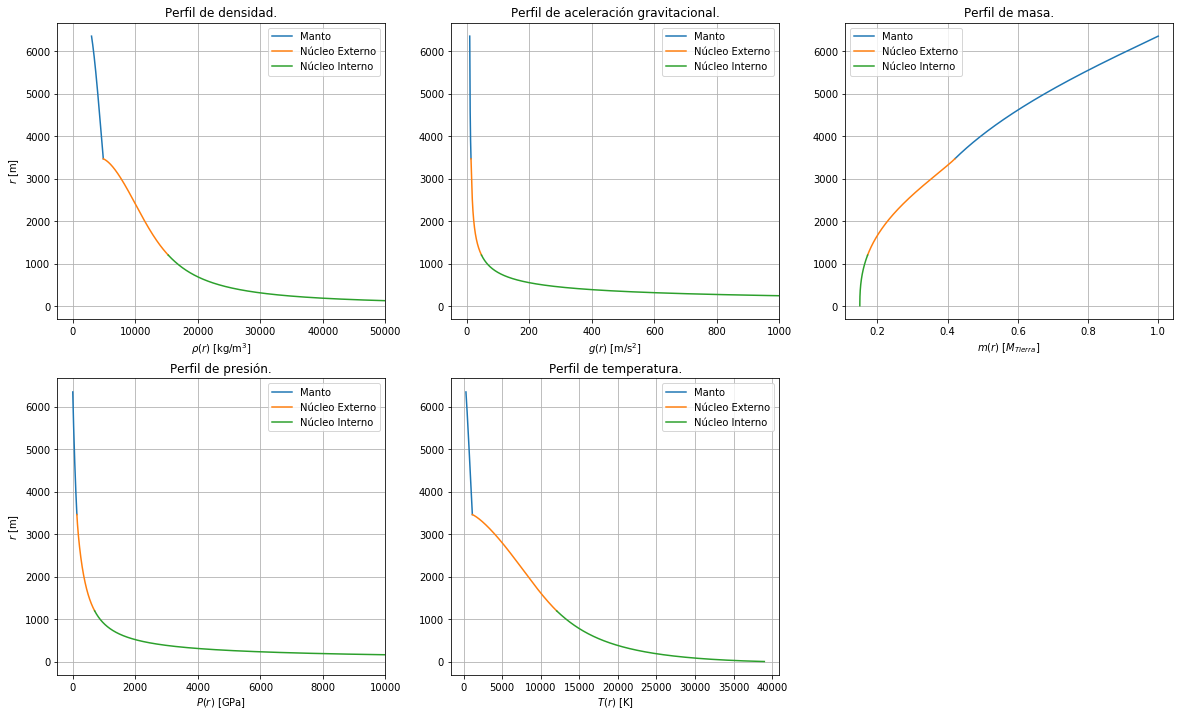

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(231) #rho
plt.title("Perfil de densidad.")
plt.plot(Manto[:,0],rManto/1000,label='Manto')
plt.plot(NucleoE[:,0],rNucleoE/1000,label='Núcleo Externo')
plt.plot(NucleoI[:,0],rNucleoI/1000,label='Núcleo Interno')
plt.xlim((-2500,50000))
plt.xlabel(r'$\rho(r)$ [kg/m$^3$]')
plt.ylabel(r'$r$ [m]')
plt.legend()
plt.grid()

plt.subplot(232) #g
plt.title("Perfil de aceleración gravitacional.")
plt.plot(Manto[:,1],rManto/1000,label='Manto')
plt.plot(NucleoE[:,1],rNucleoE/1000,label='Núcleo Externo')
plt.plot(NucleoI[:,1],rNucleoI/1000,label='Núcleo Interno')
plt.xlim((-50,1000))
plt.xlabel(r'$g(r)$ [m/s$^2$]')
plt.legend()
plt.grid()

plt.subplot(233) #m
plt.title("Perfil de masa.")
plt.plot(Manto[:,2]/MT,rManto/1000,label='Manto')
plt.plot(NucleoE[:,2]/MT,rNucleoE/1000,label='Núcleo Externo')
plt.plot(NucleoI[:,2]/MT,rNucleoI/1000,label='Núcleo Interno')
plt.xlabel(r'$m(r)$ [$M_{Tierra}$]')
plt.legend()
plt.grid()

plt.subplot(234) #P
plt.title("Perfil de presión.")
plt.plot(Manto[:,3]/1e9,rManto/1000,label='Manto')
plt.plot(NucleoE[:,3]/1e9,rNucleoE/1000,label='Núcleo Externo')
plt.plot(NucleoI[:,3]/1e9,rNucleoI/1000,label='Núcleo Interno')
plt.xlim((-500,10000))
plt.xlabel(r'$P(r)$ [GPa]')
plt.ylabel(r'$r$ [m]')
plt.legend()
plt.grid()

plt.subplot(235) #T
plt.title("Perfil de temperatura.")
plt.plot(Manto[:,4],rManto/1000,label='Manto')
plt.plot(NucleoE[:,4],rNucleoE/1000,label='Núcleo Externo')
plt.plot(NucleoI[:,4],rNucleoI/1000,label='Núcleo Interno')
plt.xlabel(r'$T(r)$ [K]')
plt.legend()
plt.grid()


> Vemos que se obtuvieron resultados razonables a excepción de la gráfica de $g(r)$, pues debería iniciar con el valor de $g_S$ para la superficie e ir disminuyendo hasta que $g(r=0)=0$ pues es sabido que la aceleración gravitacional es causada por la masa encerrada por $r$, ya que el efecto de la masa que está fuera de $r$ genera efectos que se contrarrestan entre sí. No queda claro que hizo que la gráfica de $g(r)$ no fuera la esperada pero las otras gráficas muestran un comportamiento normal: la densidad, presión y temperatura crecen mientras $r \rightarrow 0 $ y mientras $r \rightarrow R_{Tierra}$ la masa se aproxima a la masa total de la Tierra.

__Problema 2:__ 
>Calcule el tamaño de las magnetosferas de los planetas gigantes del Sistema Solar. Describa el
modelo de viento solar que usará para los cálculos. Referencia: Grießmeier, J.-M., Stadelmann, A.,
Grenfell, J.L., Lammer, H., Motschmann, U., 2009. On the protection of extrasolar Earth-like
planets around K/M stars against galactic cosmic rays. Icarus 199, 526–535.

__Solución:__

> De acuerdo con Grießmeier et al. (2009) la distancia máxima a la que se extiende la magnetósfera de un planeta (_Standoff distance_) está dada por: $$ R_S = \bigg{[} \frac{ \mu_0 f_0^2 M_d^2 }{ 8\pi^2(m \eta v_{eff}^2 + 2 \eta k_BT) } \bigg{]}^{1/6}$$
Donde:
- $\mu_0=4\pi \times 10^{-7} \text{N/A}$ es la permitividad magnética del vacío.
- $f_0=1.16$ es el factor geométrico de la magnetósfera.
- $M_d$ es el momento dipolar magnético del planeta.
- $m=1.6726 \times 10^{-27} \text{kg}$ es la masa del protón.
- $\eta$ es la densidad volumétrica de partículas del viento solar.
- $v_{eff}$ es la rapidez de las partículas del viento solar.
- $k_B$ es la constante de Boltzmann.
- $T$ es la temperatura del plasma interplanetario.

> Generalmente el término $2\eta k_B T$ es pequeño y al considerar grandes distancias del Sol se vuelve despreciable. Por lo que aquí se considera la ecuación: $$ R_S = \bigg{[} \frac{ \mu_0 f_0^2 M_d^2 }{ 8\pi^2m \eta v_{eff}^2} \bigg{]}^{1/6} $$
Los valores a hallar son los de $\eta (r)$ y $v_{eff}(r)$. En el mismo artículo se indica que $v_{eff}=(v^2+v_{orbit}^2)^{1/2}$, donde $v_{orbit}$ es la rapidez orbital del planeta y $v$ es la rapidez del viento solar.

> En Parker (1958b) se propone el siguiente modelo de $\eta (r)$ y $v(r)$:
$$ \boxed{\eta(r)=\eta_0 \bigg{(} \frac{a}{r} \bigg{)}^{\lambda-1}} \space{(\text{Ec. 1})} $$
$$ \eta(r) v(r)= \eta_0 v_0 \bigg{(} \frac{a}{r} \bigg{)}^{2}$$
Donde $\lambda=\frac{GM_{Sol}m}{2k_B T_0 a}$, $a=10^9 \text{m}$, $\eta_0=3\times 10^{13} \text{m}^{-3}$, $T_0=3\times 10^6 \text{K}$ y $v_0=160 \text{km/s}$.

> De modo que al combinar las ecuaciones anteriores y sabiendo que para órbitas circulares $v_{orbit}^2=GM_{Sol}/r$, tenemos entonces que: 
$$\boxed{v_{eff}(r)=\bigg{[} v_0^2 \bigg{(}\frac{a}{r}\bigg{)}^{2(3-\lambda)} + \frac{GM_{Sol}}{r} \bigg{]}^{1/2}} \space{(\text{Ec. 2})}$$

>Ahora solo debemos calcular para los 4 planetas gigantes los valores de $v_{eff}$ y $\eta$ y obtener así el valor de $R_S$:

In [ ]:
#Definimos las constantes necesarias:

MdT=7.94e22 #A m^2
m=1.6726e-27 #kg
G=6.67e-11 #N m^2 kg^-2
UA=1.4959e11 #m
MSol=1.98e30 #kg
a=1e9 #m
T0=3e6 #K
n0=3e13 #m^-3
v0=160000 #m/s
kB=1.3806e-23 #kg m^2 s^-2 K^-1
mu0=4*np.pi*1e-7 #N/A
f0=1.16
la=(G*MSol*m)/(2*kB*T0*a)

In [ ]:
#Definimos la función para veff:
def veff(r):
    veff=( (v0**2)*((a/r)**(6-2*la)) + ((G*MSol)/r))**0.5
    print("velocidad efectiva",veff)
    return veff
#Definimos la función para eta:
def n(r):
    n=n0*((a/r)**(la-1))
    print("eta",n)
    return n
#Definimos la función para Rs:
def Rs(r,Md):
    Rs=((mu0*(f0**2)*(Md**2))/(8*(np.pi**2)*m*n(r)*((veff(r))**2)))**(1/6)
    return Rs

In [ ]:
#Creamos los arreglos con los momentos dipolares y los semiejes mayores para cada planeta en orden de Júpiter a Neptuno.
Mds=np.array([20000,600,50,25])*MdT
rs=np.array([5.2,9.6,19.2,30.1])*UA

In [ ]:
#Calculamos el Standoff Distance para cada planeta.
Rs(rs,Mds)

eta [4.56067155e+08 1.64155985e+08 5.17069373e+07 2.44406291e+07]
velocidad efectiva [21733.20744999 17117.23911686 13138.55312127 11098.16474858]


array([2.30477266e+09, 9.19448117e+08, 5.31757375e+08, 5.05873257e+08])

> Entonces se obtuvo que para:
- Júpiter: $R_S=2.3\times 10^9\text{m}\approx 33 R_J$
- Saturno: $R_S=9.2\times 10^8\text{m}\approx 15.8 R_S$
- Urano: $R_S=5.3\times 10^8\text{m}\approx 20.9 R_U$
- Neptuno: $R_S=5.1\times 10^8\text{m}\approx 20.7 R_N$

__Problema 3:__ 
>Considere un impacto entre un meteorito rocoso (ρ = 3,0 g/cm3) de 325 m de diámetro contra la Tierra (El asteroide 99942-
Apophis, tiene este tamaño y densidad, y cruzará a unos 30000 km de distancia de la Tierra en abril
de 2029):
- Calcule la energía cinética involucrada en el impacto si el meteorito golpea la Tierra a una velocidad
de 12.6 km/s.
- Exprese la energía del impacto en megatones (Mton) y en escala de Richter. (1 Mton = 4.18x1015 J).
- La bomba “Castle-Bravo” probada por Estados Unidos en 1954 liberó 15 Mton, ¿cuantas bombas
“Castle-Bravo” serían equivalentes a la energía de Apophis?
- Estime el tamaño del cráter formado por una colisión directa (90o) y el tamaño si la colisión se da
con un ángulo de 30o con el horizonte local.
- Si las rocas excavadas del cráter tienen velocidades de eyección de unos 500 m/s, calcule que tan
lejos del cráter pueden formarse cráteres secundarios, formados por estas rocas.

__Solución:__
- *Energía cinética:*

> Tenemos que la energía cinética de un cuerpo de masa $m$ viajando con una rapidez $v$ es: $$K=\frac{1}{2}mv^2$$
La masa de Apophis está dada por $m=V\rho$, considerando al asteroide esférico se tiene entonces que: $$m=\frac{4}{3}\pi R^3 \rho$$
Y sabiendo que para Apophis $R=162.5m$, tenemos que: $$ \boxed{K=\frac{2}{3} R^3 \rho v^2=4.28 \times 10^{18} \text{J}}$$

- *Energía del impacto:*

> Sabiendo que: $1\text{Mt}=4.18\times 10^{15} \text{J}$ tenemos que $$\boxed{K \approx 1024 \text{Mt}=2^{10} \text{Mt}}$$
Ahora para calcular la magnitud de la colisión en escala de Richter se usa la ecuación: $$\log{E}=12.24+1.44M_R$$
Donde $E$ es la energía en ergios y $M_R$ es la magnitud de Richter.
En este caso $E=K=4.28\times 10^{25} \text{erg}$, despejando $M_R$ se obtiene que: $$\boxed{M_R=\frac{\log{K} -12.24}{1.44}=9.30}$$

- *En "Castle-Bravos":*

> La energía liberada por Castle-Bravo fue de $E_{CB}=15\text{Mt}$, con lo que se tiene que: $$\boxed{K=1024 \text{Mt}\bigg{(}\frac{E_{CB}}{15\text{Mt}}\bigg{)}=68.3 E_{CB}}$$

- *Tamaño del cráter:*

> La ecuación para determinar el tamaño del cráter es: $$D=1.8\rho_m^{0.11} \rho_p^{-0.33} g^{-0.22} D_m^{0.13} K^{0.22} \sin^{1/3}{\theta}$$
Donde $\rho_m$ es la densidad del cuerpo impactor, $\rho_p$ es la densidad del planeta impactado, $g$ es la aceleración gravitacional en la superficie del planeta, $D_m$ es el diámetro del cuerpo impactor, $K$ es la energía cinética del impactor al momento del impacto y $\theta$ es el angulo de impacto respecto al horizonte.

> En este caso tenemos que $\rho_m=\rho_p=3000 \text{kg/m}^3$, $g=9.81 \text{m/s}^2$, $D_m=2R=325 \text{m}$ y $K=4.28 \times 10^{18} \text{J}$

>De modo que para un impacto directo: $$\boxed{D(\theta=90^{\circ}) \approx 5 \text{km}}$$

>Y para un impacto con $\theta =30^{\circ}$: $$D(\theta=30^{\circ})=D(\theta=90^{\circ})\sin^{1/3}{30^{\circ}}$$
$$\boxed{D(\theta=30^{\circ}) \approx 4 \text{km} }$$

- *Posibles cráteres secundarios:*

> Teniendo en cuenta que la rapidez de eyección de las rocas excavadas ($v_o=500 \text{m}/\text{s}$) es mucho menor a la primera velocidad cósmica ($v\approx 8 \text{km/s}$) podemos suponer que la aceleración gravitacional no cambia a lo largo de la trayectoria que sigan antes de formar los cráteres secundarios, por lo que podemos usar la ecuación de tiro parabólico para el alcance máximo horizontal de una partícula con velocidad inicial $v_o$ y lanzada con un ángulo de elevación respecto al horizonte $\theta$: $$ x_{max}=\frac{v_o^2 \sin{2\theta}}{g} $$
En este caso como queremos saber que tan lejos pueden llegar a caer las rocas excavadas usamos $\theta=45 ^{\circ}$, que es el ángulo de máximo alcance para una rapidez inicial dada.
Con esto tenemos que la distancia máxima a la que pueden formarse cráteres secundarios es de: $$\boxed{x_{max}=\frac{v_o^2}{g}\approx 25.5 \text{km}}$$

__Problema 4:__
> Teniendo en cuenta que el diámetro del cráter de Chicxulub es de unos 180 km, calcular el
tamaño del impactor suponiendo lo siguiente:
- Un impacto directo de un objeto proveniente del cinturón principal de asteroides. Esto supone
asumir una densidad y una velocidad ajustadas a dichos objetos.
- Un impacto directo de un objeto cometario proveniente de la nube de Oort. Esto supone asumir una
densidad y una velocidad ajustadas a dichos objetos.

__Solución:__

> Debe usarse la ecuación para el diámetro del cráter: $$D=1.8\rho_m^{0.11} \rho_p^{-0.33} g^{-0.22} D_m^{0.13} K^{0.22} \sin^{1/3}{\theta}$$
Considerando un cuerpo esférico de densidad $\rho_m$ y diámetro $D_m$, tenemos que su energía cinética estará dada por $K=\frac{\pi}{12}v^2 \rho_m D_m^3$

> De modo que al considerar un impacto directo ($\theta =90^{\circ}$) y despejar $D_m$ obtenemos:
$$D_m = \bigg{(}  \frac{ D \rho_p^{0.33} g^{0.22} }{ 1.3404 \rho_m^{0.33} v^{0.44} }  \bigg{)}^{1/0.79}$$

- *Considerando un obeto proveniente del Cinturón de Asteroides:*

> Considerando que los cuerpos del Cinturón Principal de asteroides alcanzan la Tierra con valores de rapidez en el rango $10 \text{km/s}<v<40 \text{km/s}$, podemos suponer la rapidez del impactor como la rapidez media $v=25 \text{km/s}$. Y la densidad media de estos cuerpos es $\rho_m \approx 3300 \text{kg/m}^3$. De modo que podemos tomar estos valores para el impactor de Chicxulub. Con esto reemplazando en la ecuación para $D_m$ se obtiene: $$ \boxed{ D_m \approx 20 \text{km} } $$

- *Considerando un obeto proveniente de la nube de Oort:*
> Según Weissman (2007) el cometa Hale-Bopp tiene una densidad aproximada de $600 \text{kg/m}^3$ y de impactar la Tierra podría hacerlo con una velocidad de $52.5 \text{km/s}$. Suponiendo al objeto impactor de Chicxulub como similar al Hale-Bopp, podemos reemplazar estos valores en la ecuación para $D_m$ y obtener: $$ \boxed{ D_m \approx 27 \text{km} } $$

__Referencias:__

- Grießmeier, J.M., Stadelmann, A., Grenfell, J.L., Lammer, H., Motschmann, U. (2009). "On the protection of extrasolar Earth-like planets around K/M stars against galactic cosmic rays". Icarus 199, 526–535.
- Parker, E. L. (1958b). "Dynamics of the Interplanetary Gas and Magnetic Fields". American Astronomical Society.
- Poirier, J. P. "Introduction to the Physics of the Earth's Interior". Cambridge University Press, (2003).
- Valencia, D.,O’Connell R. J., Sasselov, D (2006). "Internal structure of massive terrestrial planets". Icarus 181, 545–554.
- Weissman, P. R. (2007). "The cometary impactor flux at the Earth". Proceedings of the International Astronomical Union.
- Zemansky, M. W., Dittman, R. H. "Heat and Thermodynamics". McGraw-Hill, (1997).